# SMARTS (SMiles ARbitrary Target Specification)
<br><br>

> 참고
* [SMARTS Theory in Daylight](http://www.daylight.com/dayhtml/doc/theory/theory.smarts.html)
* [SMARTS Tutorial in Daylight](http://www.daylight.com/dayhtml_tutorials/languages/smarts)
* [RDKit](https://www.rdkit.org/)
* [SMILES manager in SAMSON](https://samson-connect.net/app/main?execution=e3s1)

SMARTS | SMILES
---- | ----
Molecular pattern | Molecular structure

### Introduction

* `SMiles ARbitrary Target Specification`
* 분자의 패턴이나 성질을 표현하기 위한 언어이다.
* 컴퓨터 프로그램에서 물질의 디지털 표현에 이용.
 > 특정 작용기를 강조하는 것 <br>
 `drug design`-*database*에 유사 구조, 특성을 가진 물질 찾기 <br>
 분석화학-모르는 물질의 구조와 특성을 예측하기

* SMARTS는 SMILES의 연장선이며, 확장된 규칙으로 구조를 구분지을 수 있게 해준다.
> `SMILES`의 모든 기호(atoms & bonds)과 성질표현(원자의 표현, 전하, 이성질체의 명시)들은 `SMARTS`에서도 유효하다. <br>
 `SMARTS`는 확장된 논리적 연산자들과 부가적인 분자 표현법도 가지고있다. <br>
  
* `SMARTS`를 이용해 유연하고 효과적인 특정 구조 찾기가 가능하다.
* 구조적 패턴을 일반성과 특수성의 여러 단계로 표현할 수 있다.<br>
 
**SMILES** |-| **SMARTS** |-
---- | ---- | ---- | ----
[CH4] | methane | [CH4] | methane
C | methane | C | `carbon atoms` with any number of hydrogens

> SMILES에선 methane을 `C` or `[CH4]`로 표현할 수 있다<br>
> SMARTS 에서 methane은 `[CH4]`이다. ( **High specificity SMARTS** ) <br>
 `[CH4]`는 **4개의 수소를 갖는 지방족 탄소 원자를 의미**하며, `ehtane`, `ethene`, `cyclopentane`의 탄소 원자들과 다르다.

> 반대로 SMARTS에서 `C`는 수소의 갯수가 `0~4`인 지방족 탄소 원자이다. ( **Low specificity SMARTS** ) <br>
 `ehtane`, `ethene`, `cyclopentane`의 **탄소 원자들이 될 수도 있다.**
>> 단독으로 쓰인 smarts code `C`는 `ehtane`, `ethene`, `cyclopentane`의 탄소 원자에 포함된다.

In [1]:
#RDkit 적용
from __future__ import print_function #2.X대 python호환을 위해
from rdkit import Chem
from rdkit.Chem import AllChem

In [2]:
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw

**`기준`.HasSubstructMatch(`비교대상`)**<br>
> 기준 물질에 비교대상의 물질이 포함되면 `True`, 아니라면 `False`를 출력한다<br>

**`기준`.GetSubstructMatch(`비교대상`)**<br>
> 포함이 된다면 포함되는 기준이 되는 대상에 `n`번째와 같은지 출력한다.<br>
 `>>> (n,)`<Br>
    
> 포함이 되지 않는다면 `()`을 출력한다.<br>
> `>>> ()`

* **GetSubstructMatch module은 둘 이상의 같은 배열을 가지더라도 첫 번째로 나온 비교대상의 순서를 출력한다.**
> 중복되는 가지가 있더라도 가장 먼저 나온 것을 출력한다.

**$\therefore$`기준`.GetSubstructMatch(`비교대상`)은 포함 여부와 몇 번째에 붙어있는 지를 표기하기에 주로 사용하겠다.**

In [3]:
AllChem.MolFromSmarts('[C]').GetSubstructMatch(AllChem.MolFromSmarts('C'))

(0,)

In [4]:
AllChem.MolFromSmiles('C').GetSubstructMatch(AllChem.MolFromSmarts('[CH4]'))

(0,)

In [5]:
AllChem.MolFromSmarts('C').GetSubstructMatch(AllChem.MolFromSmiles('CBr'))

()

In [6]:
AllChem.MolFromSmarts('C').GetSubstructMatch(AllChem.MolFromSmarts('[CH4]'))

RuntimeError: Pre-condition Violation
	getNumImplicitHs() called without preceding call to calcImplicitValence()
	Violation occurred on line 153 in file Code\GraphMol\Atom.cpp
	Failed Expression: d_implicitValence > -1
	RDKIT: 2016.09.4
	BOOST: 1_59


In [7]:
AllChem.MolFromSmarts('[CH4]').GetSubstructMatch(AllChem.MolFromSmarts('C'))

(0,)

In [8]:
AllChem.MolFromSmiles('CC').GetSubstructMatch(AllChem.MolFromSmarts('[CH4]'))

()

In [9]:
AllChem.MolFromSmiles('CC').GetSubstructMatch(AllChem.MolFromSmarts('C'))

(0,)

In [10]:
AllChem.MolFromSmiles('CC').GetSubstructMatch(AllChem.MolFromSmarts('CC'))

(0, 1)

In [11]:
AllChem.MolFromSmarts('CC').GetSubstructMatch(AllChem.MolFromSmarts('C'))

(0,)

In [12]:
AllChem.MolFromSmarts('CC').GetSubstructMatch(AllChem.MolFromSmiles('C'))

(0,)

In [13]:
AllChem.MolFromSmarts('CC').GetSubstructMatch(AllChem.MolFromSmiles('CC'))

(0, 1)

In [14]:
AllChem.MolFromSmarts('CC').GetSubstructMatch(AllChem.MolFromSmarts('CBr'))

()

In [15]:
AllChem.MolFromSmarts('CCCBrCCBr').GetSubstructMatch(AllChem.MolFromSmarts('CCBr'))

(1, 2, 3)

In [16]:
AllChem.MolFromSmarts('CCBrCCCBr').GetSubstructMatch(AllChem.MolFromSmarts('CCBr'))

(0, 1, 2)

In [17]:
AllChem.MolFromSmarts('C=C').GetSubstructMatch(AllChem.MolFromSmarts('CC'))

()

In [18]:
AllChem.MolFromSmarts('C=C').GetSubstructMatch(AllChem.MolFromSmarts('C*'))

()

In [19]:
AllChem.MolFromSmarts('C=C').GetSubstructMatch(AllChem.MolFromSmiles('C=C'))

(0, 1)

In [20]:
AllChem.MolFromSmarts('C=C').GetSubstructMatch(AllChem.MolFromSmarts('C=*'))

(0, 1)

In [21]:
AllChem.MolFromSmarts('CCC').GetSubstructMatch(AllChem.MolFromSmarts('CC'))

(0, 1)

In [22]:
AllChem.MolFromSmarts('CCC').GetSubstructMatch(AllChem.MolFromSmarts('CC*'))

(0, 1, 2)

In [23]:
AllChem.MolFromSmarts('[C]').GetSubstructMatch(AllChem.MolFromSmarts('C'))

(0,)

$\therefore$ `[CH4]`는 `C`를 포함하고, `C`는 `[CH4]`를 포함하지 않는다.<br>
* **smarts code `C`뒤의 생략된 표현은 수소이지 다른 원자를 생략한 표현은 아니다.**<Br>
* **smarts code `[CH4]`는 완벽히 수소의 갯수를 명시해준 것임으로 `C`에 포함될 수 없다.**
* **smarts code 中 wild card(*)가 탄소를 포함한 임의의 원자를 생략한 표현이다.**<br>
    
**`기준`.GetSubstructMatch(`비교대상`)**<br>
* **GetSubstructMatch module은 둘 이상의 같은 배열을 가지더라도 첫 번째로 나온 비교대상의 순서를 출력한다.**

### 1.Atomic Primitives
* SMARTS는 SMILES에서 사용되는 원자의 특징(원자 기호, 전하, 이성질체의 명시)보다 더 큰 범주의 많은 원자의 표현을 제공한다.
* <**n**> : 숫자 , <**c**> : chiral class

Symbol | Symbol name | Atomic property requirements | Default
---- | ---- | ----| ----
* | wildcard | any atom | (no default)
a | aromatic | aromatic | (no default)
A | aliphatic | aliphatic | (no default)
D<$n$> | degree | <$n$> explicit connections | exactly one
H<$n$> | total-H-count | <$n$> attached hydrogens | exactly one
h<$n$> | implicit-H-count | <$n$> implicit hydrogens | at least one
R<$n$> | ring membership | in <$n$> SSSR rings | any ring atom
r<$n$> | ring size | in smallest SSSR ring of size <$n$> | any ring atom
v<$n$> | valence | total bond order <$n$> | exactly one
X<$n$> | connectivity | <$n$> total connections | exactly one
x<$n$> | ring connectivity | <$n$> total ring connections | at least one
- <$n$> | negative charge | -<$n$> charge | -1 charge (-- is -2, etc)
+<$n$> | positive charge | +<$n$> formal charge | +1 charge (++ is +2, etc)
#n | atomic number | atomic number <$n$> | (no default)
@ | chirality | anticlockwise | anticlockwise, default class
@@ | chirality | clockwise | clockwise, default class
@<$c$><$n$> | chirality | chiral class <$c$> chirality <$n$> | (nodefault)
@<$c$><$n$>? | chiral or unspec | chirality <$c$><$n$> or unspecified | (no default)
<$n$> | atomic mass | explicit atomic mass | unspecified mass


> **Examples** <br>

Symbol | Atomic property requirements
---- | ----
[C] | aliphatic carbon atom
[c] | aromatic carbon atom
[a] | aromatic atom
[#6] | carbon atom
[Ca] | calcium atom
[++] | atom with a +2 charge | 
[R] | atom in any ring
[D3] | atom with 3 explicit bonds (implicit H's don't count)
[X3] | atom with 3 total bonds (includes implicit H's)
[v3] | atom with bond orders totaling 3 (includes implicit H's)
C[C@H](F)O | match chirality (H-F-O anticlockwise viewed from C)
C[C@?H](F)O | matches if chirality is as specified or is not specified

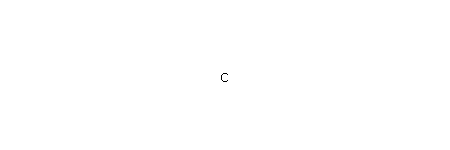

In [24]:
ex1 = AllChem.MolFromSmarts('[#6]')
ex1

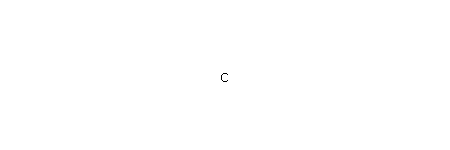

In [25]:
ex2 = AllChem.MolFromSmarts('[c]')
ex2

In [26]:
ex1.HasSubstructMatch(ex2)

False

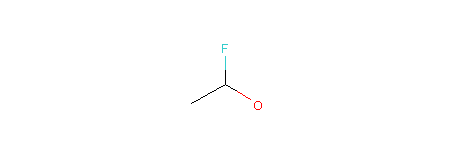

In [27]:
ex1 = AllChem.MolFromSmarts('C[C@H](F)O')
ex1

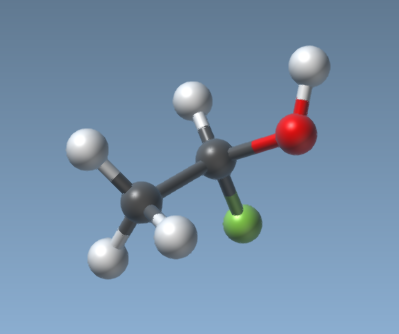

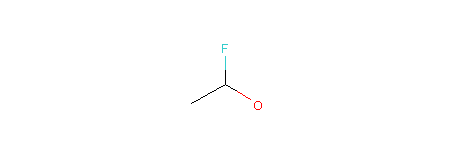

In [28]:
ex2 = Chem.MolFromSmarts('C[C@@H](F)O')
ex2

In [29]:
ex1.HasSubstructMatch(ex2, useChirality=True)

False

In [30]:
IPythonConsole.molSize = (250,200)
from rdkit.Chem import AllChem
import math
import rdkit
import time
print(rdkit.__version__)
print(time.asctime())

2016.09.4
Tue Apr  9 15:59:58 2019


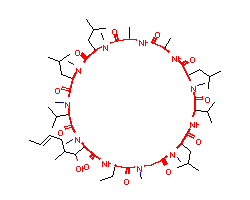

In [31]:
m = Chem.MolFromSmiles('C/C=C/CC(C)C(O)C1C(=O)NC(CC)C(=O)N(C)CC(=O)N(C)C(CC(C)C)C(=O)NC(C(C)C)C(=O)N(C)C(CC(C)C)C(=O)NC(C)C(=O)NC(C)C(=O)N(C)C(CC(C)C)C(=O)N(C)C(CC(C)C)C(=O)N(C)C(C(C)C)C(=O)N1C')

core = Chem.MolFromSmiles('C1C(=O)NCC(=O)NCC(=O)NCC(=O)NCC(=O)NCC(=O)NCC(=O)NCC(=O)NCC(=O)NCC(=O)NCC(=O)N1')
m.GetSubstructMatch(core)
m

In [32]:
naphthalene = Chem.MolFromSmiles('c12ccccc1cccc2')
benzoxazole = Chem.MolFromSmiles('n1c2ccccc2oc1')
indane = Chem.MolFromSmiles('c1ccc2c(c1)CCC2')
skatole = Chem.MolFromSmiles('CC1=CNC2=CC=CC=C12')
benzene = Chem.MolFromSmiles('c1ccccc1')
quinoline = Chem.MolFromSmiles('n1cccc2ccccc12')

my_molecules = [naphthalene, 
                benzoxazole,
                indane,
                skatole,
                benzene,
                quinoline,
               ]

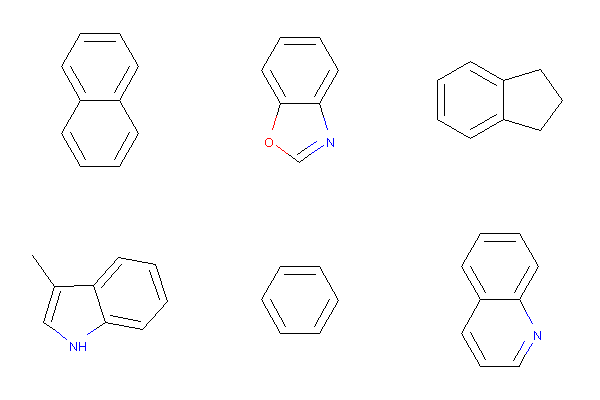

In [33]:
Draw.MolsToGridImage(my_molecules, useSVG=False)

In [34]:
is_in_two_rings = Chem.MolFromSmarts('[R2]')
[mol.HasSubstructMatch(is_in_two_rings) for mol in my_molecules]

[True, True, True, True, False, True]

In [35]:
mol1 = Chem.MolFromSmiles('c1ccccc1')
mol2 = Chem.MolFromSmiles('o1cccc1')
mol3 = Chem.MolFromSmiles('C1CCCCC1')

my_mol = [mol1,
          mol2,
          mol3
         ]

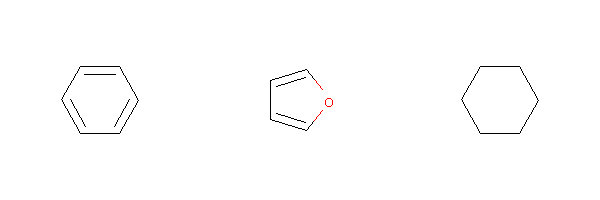

In [36]:
Draw.MolsToGridImage(my_mol, useSVG=False)

In [37]:
aromatic = Chem.MolFromSmarts('c')
[mol.HasSubstructMatch(aromatic) for mol in my_mol]

[True, True, False]

In [38]:
mol1 = Chem.MolFromSmiles('[Fe++]')
mol2 = Chem.MolFromSmiles('[Na+]')
mol3 = Chem.MolFromSmiles('[Mg++]')

my_mol = [mol1,
          mol2,
          mol3
         ]

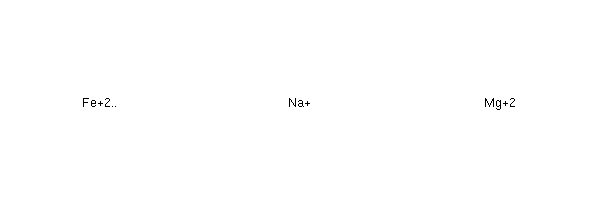

In [39]:
Draw.MolsToGridImage(my_mol, useSVG=False)

In [40]:
charged = Chem.MolFromSmarts('[+]')
[mol.HasSubstructMatch(charged) for mol in my_mol]

[False, True, False]

In [41]:
charged = Chem.MolFromSmarts('[++]')
[mol.HasSubstructMatch(charged) for mol in my_mol]

[True, False, True]

### 2. Bond Primitives(결합의 기본,원시)
* 다양한 표현을 이용해 원자들의 결합을 나타낼 수 있다.
* 생략된 결합은 ' 단일 혹은 방향족 결합 '을 의미한다.

Symbol | Atomic property requirements
---- | ----
- | single bond (aliphatic)
/ | directional bond "up"1
\ | directional bond "down"1
**/?** | directional bond "up or **unspecified**"
**`\?`** | directional bond "down or **unspecified**"
= | double bond
# | triple bond
: | aromatic bond
~ | any bond (wildcard)
@ | any ring bond1

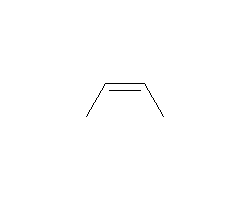

In [42]:
m = AllChem.MolFromSmarts('C\C=C/C')
m

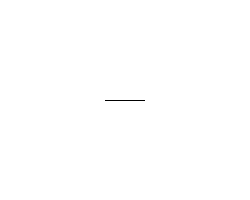

In [43]:
m = AllChem.MolFromSmarts('C\C')
m

In [44]:
# 간단히 Match를 이용해 확인할 수 있다.
AllChem.MolFromSmarts('C\C=C/C').GetSubstructMatch(AllChem.MolFromSmarts('C\C'))

(0, 1)

In [45]:
AllChem.MolFromSmarts('C\C=C/C').GetSubstructMatch(AllChem.MolFromSmarts('C=C'))

(1, 2)

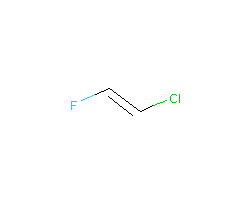

In [46]:
m = AllChem.MolFromSmarts('F/[#6]=C/Cl')
m

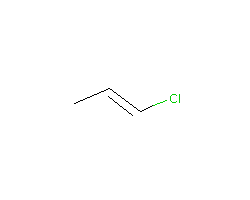

In [89]:
m = AllChem.MolFromSmarts('C/C=C/Cl')
m
# 결과가 나오지 않는 것은 틀린것이다. 이를 파이썬 프롬프트 창에서 하면 에러가 뜬다.

In [85]:
AllChem.MolFromSmarts('C/?[#6]=C/Cl').GetSubstructMatch(AllChem.MolFromSmarts('FC'))

AttributeError: 'NoneType' object has no attribute 'GetSubstructMatch'

> Molecules where a carbon (`which is connected to a fluorine by a directional "up or unspecified" bond`) is connected to another carbon (`which is connected by an "up" bond to a chlorine`)<br>
>> F와 'up' 또는 'unspecified' 방향으로 연결된 탄소가 Cl과 'up' 방향으로 연결된 탄소와 결합한 물질.<br>
(e.g. F/C=C/Cl and FC=C/Cl ).<br>

> This excludes molecules where a carbon (`which is connected to a fluorine by a "down" bond`) is connected to another carbon (`which is connected to a chlorine by an "up" bond`)
>> 또한, F와 'down'으로 연결된 탄소와 Cl과 결합(up방향)한 탄소와 결합한 물질. 

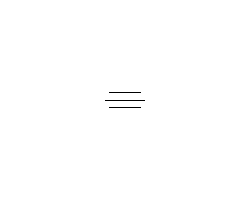

In [49]:
# 삼중결합
m = AllChem.MolFromSmarts('C#C')
m

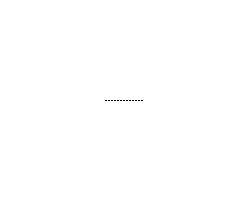

In [50]:
# 어떤 결합.(Wild Card)
m = AllChem.MolFromSmarts('C~C')
m

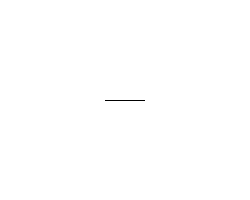

In [51]:
# 표시하지 않은 것 = '단일결합' 또는 ' 방향족 결합'
m1 = AllChem.MolFromSmarts('CC')
m1

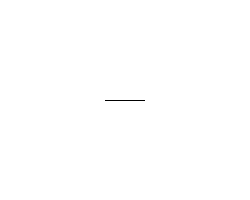

In [52]:
# 단일결합
mol = AllChem.MolFromSmarts('C-C')
mol

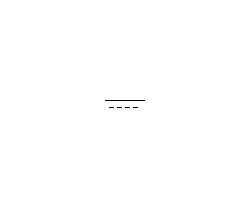

In [53]:
# 소문자는 방향족을 나타낸다.
mol = AllChem.MolFromSmarts('cc')
mol

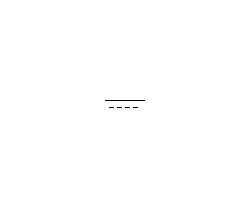

In [54]:
mol = AllChem.MolFromSmarts('C:C')
mol

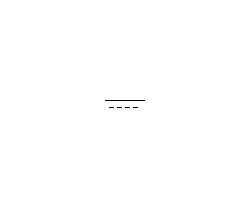

In [55]:
mol = AllChem.MolFromSmarts('c:c')
mol

In [56]:
# 표시하지 않은 결합은 '단일'결합 또는 '방향족'결합 이다.
AllChem.MolFromSmarts('C-C').GetSubstructMatch(AllChem.MolFromSmarts('CC'))

(0, 1)

In [57]:
# 표시하지 않은 결합은 '단일'결합 또는 '방향족'결합 이다.
AllChem.MolFromSmarts('C=C').GetSubstructMatch(AllChem.MolFromSmarts('CC'))

()

In [58]:
AllChem.MolFromSmarts('C=C').GetSubstructMatch(AllChem.MolFromSmarts('C~C'))

(0, 1)

In [59]:
# 표시하지 않은 결합은 '단일'결합 또는 '방향족'결합 이다.
AllChem.MolFromSmarts('C:C').GetSubstructMatch(AllChem.MolFromSmarts('CC'))

(0, 1)

> 그러나 여기서 대문자`C`와 소문자`c` 를 다른 것으로 인식한다.

In [60]:
AllChem.MolFromSmarts('cc').GetSubstructMatch(AllChem.MolFromSmarts('CC'))

()

In [61]:
AllChem.MolFromSmarts('cc').GetSubstructMatch(AllChem.MolFromSmarts('C:C'))

()

In [62]:
AllChem.MolFromSmarts('cc').GetSubstructMatch(AllChem.MolFromSmarts('cc'))

(0, 1)

In [63]:
AllChem.MolFromSmarts('cc').GetSubstructMatch(AllChem.MolFromSmarts('c:c'))

(0, 1)

In [64]:
AllChem.MolFromSmarts('c1ccccc1').GetSubstructMatch(AllChem.MolFromSmarts('C:C'))

()

In [65]:
AllChem.MolFromSmarts('c1ccccc1').GetSubstructMatch(AllChem.MolFromSmarts('cc'))

(0, 1)

In [66]:
AllChem.MolFromSmarts('C1:C:C:C:C:C:1').GetSubstructMatch(AllChem.MolFromSmarts('C:C'))

(0, 1)

In [67]:
AllChem.MolFromSmarts('C1:C:C:C:C:C:1').GetSubstructMatch(AllChem.MolFromSmarts('cc'))

()

### c1ccccc1 Bond Length
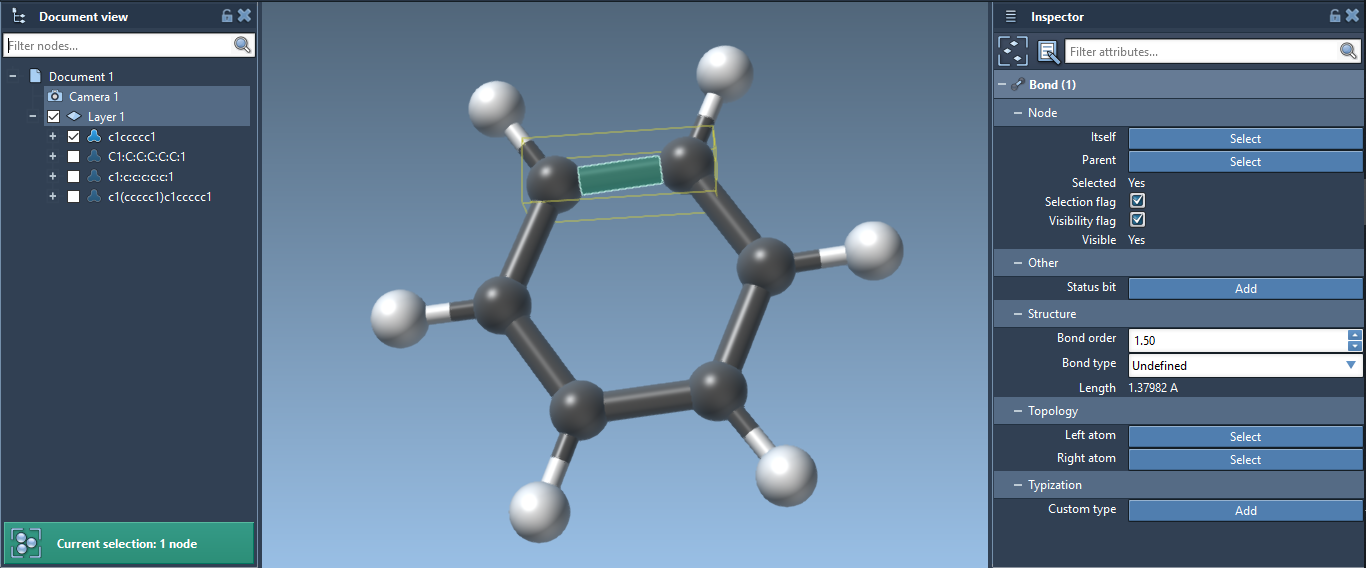 <br>

### C1:C:C:C:C:C:1
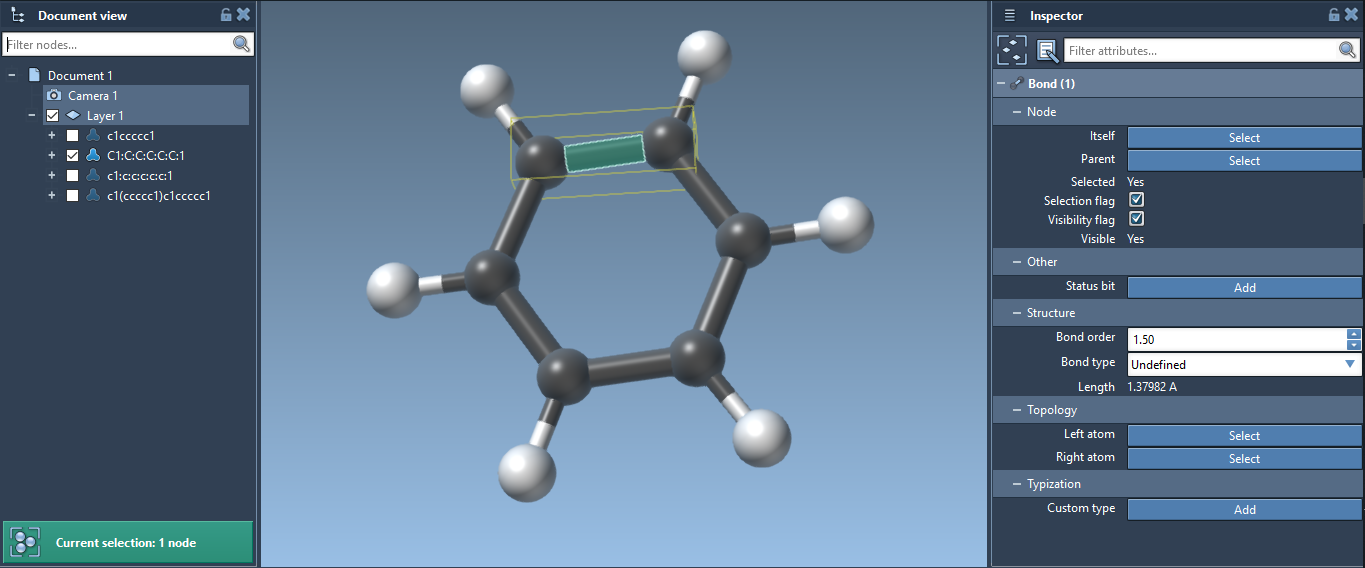 <br>

### c1:c:c:c:c:c:1
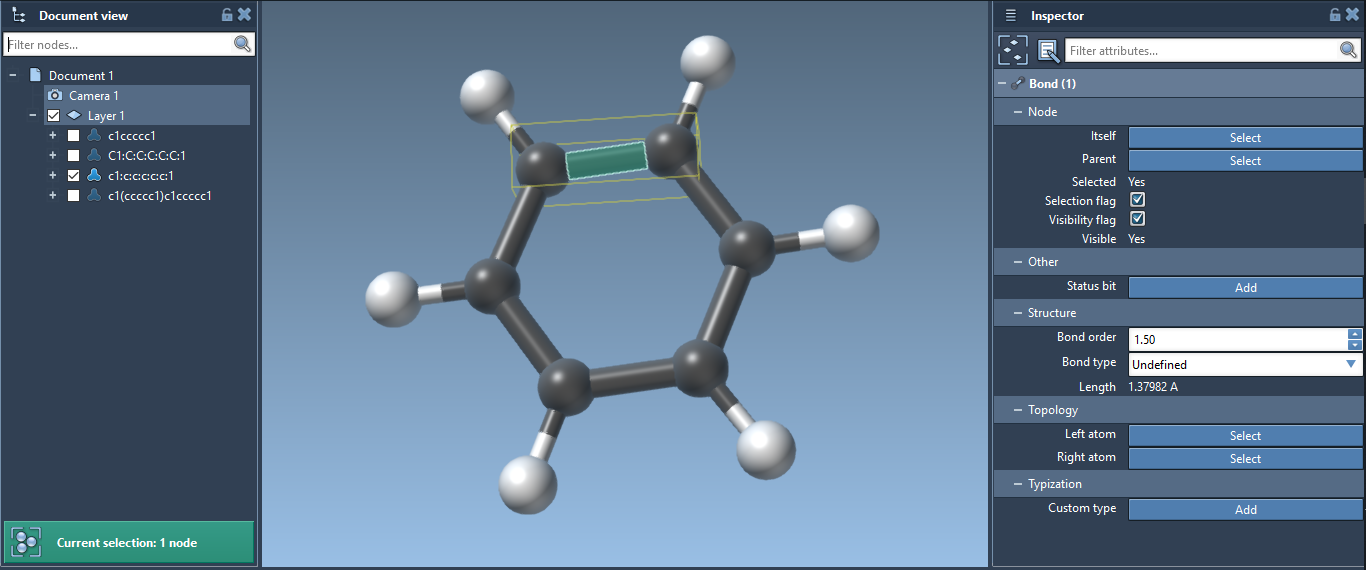 <br>

SAMSON SMILES Manager로 확인한 결과 같은 것으로 생각된다.

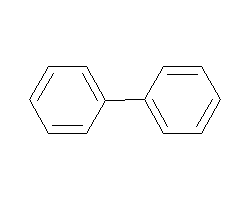

In [68]:
# Smiles
m = AllChem.MolFromSmiles('c1ccccc1c2ccccc2') 
m

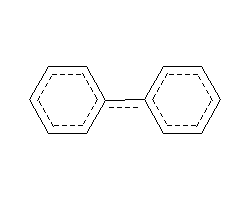

In [69]:
# Smarts
m = AllChem.MolFromSmarts('c1ccccc1c2ccccc2')
m

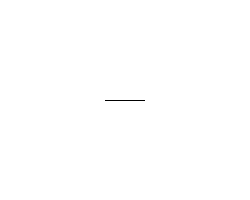

In [70]:
# 방향족 단일결합
m = AllChem.MolFromSmarts('c-c')
m

In [71]:
# Smiles
AllChem.MolFromSmiles('c1ccccc1c2ccccc2').GetSubstructMatch(AllChem.MolFromSmarts('cc'))

(0, 1)

In [72]:
# Smiles
AllChem.MolFromSmiles('c1ccccc1c2ccccc2').GetSubstructMatch(AllChem.MolFromSmarts('c-c'))

(5, 6)

In [73]:
# Smarts
AllChem.MolFromSmarts('c1ccccc1c2ccccc2').GetSubstructMatch(AllChem.MolFromSmarts('cc'))

(0, 1)

In [74]:
# Smarts
AllChem.MolFromSmarts('c1ccccc1c2ccccc2').GetSubstructMatch(AllChem.MolFromSmarts('c-c'))

()

> C:C 와 c:c 모두 alphatic(방향족) 결합을 의미하지만, `C` 와 `c`의 차이로 Match로 확인할 때 False가 나온다.<br>

### Smarts -vs- Smiles



### 3. Logical Operators ( 논리연산자 )

> SMARTS의 규칙들에 추가적으로 논리 연산자를 이용해 복잡한 표현도 가능하다.

Symbol | Expression | Meaning
-------|-------|---------
exclamation | `!e1` | not e1
ampersand | `e1&e2` | e1 and e2 (high precedence)
comma | `e1,e2` | e1 or e2
semicolon | `e1;e2` | e1 and e2 (low precedence)

<br>

`e`는 지금까지 본 SMARTS의 원자, 결합의 표현들이다.

복잡한 표현들은 반드시 대괄호 `[,]`안에 써야한다.<br>
두개의 표현이 있을 때 기본적으로 둘다 참으로 인식한다.(디폴트는 `&` 이다.)

표현 | 의미 
---------|----------
[CH2] | aliphatic carbon with two hydrogens (methylene carbon)
[!C;R] | ( NOT aliphatic carbon ) AND in ring
[!C;!R0] | same as above ("!R0" means not in zero rings)
[n;H1]	| H-pyrrole nitrogen
[n&H1]	| same as above
[nH1]	| same as above
[c,n&H1]	| any arom carbon OR H-pyrrole nitrogen
[X3&H0]	| atom with 3 total bonds and no H's
[c,n;H1]	| (arom carbon OR arom nitrogen) and exactly one H
[Cl]	| any chlorine atom
[35*]	| any atom of mass 35
[35Cl]	| chlorine atom of mass 35
[F,Cl,Br,I]	| the 1st four halogens.

In [75]:
AllChem.MolFromSmarts('[!c]').GetSubstructMatch(AllChem.MolFromSmarts('[!c]'))

()

In [76]:
AllChem.MolFromSmarts('[!c]').GetSubstructMatch(AllChem.MolFromSmarts('[C]'))

()

In [77]:
AllChem.MolFromSmarts('[1H,2*]').GetSubstructMatch(AllChem.MolFromSmarts('[H]'))

()

In [78]:
AllChem.MolFromSmarts('CC1=CNC2=CC=CC=C12').GetSubstructMatch(AllChem.MolFromSmarts('[H,C]'))

RuntimeError: Pre-condition Violation
	getNumImplicitHs() called without preceding call to calcImplicitValence()
	Violation occurred on line 153 in file Code\GraphMol\Atom.cpp
	Failed Expression: d_implicitValence > -1
	RDKIT: 2016.09.4
	BOOST: 1_59


In [79]:
AllChem.MolFromSmarts('[CH4]').GetSubstructMatch(AllChem.MolFromSmarts('[F,N]'))

()

In [80]:
AllChem.MolFromSmarts('[N,#8]').GetSubstructMatch(AllChem.MolFromSmarts('[B,C]'))

()

In [81]:
AllChem.MolFromSmarts('[#7,C&+O,+1]').GetSubstructMatch(AllChem.MolFromSmarts('[N,C]'))

(0,)

In [82]:
AllChem.MolFromSmarts('[#7,C&+O,+1]').GetSubstructMatch(AllChem.MolFromSmarts('[C+2,N]'))

(0,)

In [83]:
AllChem.MolFromSmarts('[#7,C&+O,+1]').GetSubstructMatch(AllChem.MolFromSmarts('[C+2&N]'))

()